# OpenSpaceCharge tests

This notebook will run the test_opensc program, and reproduce the benchmark plots in:

C. E. Mayes, R. D. Ryne, D. C. Sagan, *3D Space Charge in Bmad*, IPAC2018, Vancouver, BC, Canada
https://accelconf.web.cern.ch/ipac2018/papers/thpak085.pdf


In [1]:
import numpy as np

import subprocess
import tempfile
import os
import time

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams['figure.figsize'] = (8,6)
%config InlineBackend.figure_format = 'retina'

In [2]:
# Executable 
TEST_BIN = os.path.abspath('../build/test_opensc')

In [3]:
# Change any of this to test

PARAMS = """
&OPENSC_TEST_PARAMS
 NXLO=1          ,
 NXHI=64         ,
 NYLO=1          ,
 NYHI=64         ,
 NZLO=1          ,
 NZHI=128         ,
 N_PARTICLE=1000000   ,
 E_TOT=  5e6    ,
 BUNCH_CHARGE=  1e-9,
 DISTTYPE = 1, 
 SIGMA_X=  1e-3,
 SIGMA_Y=  1e-3,
 SIGMA_Z=  1e-4,
 GAUSSIANCUTOFF=  4    ,
 DIRECT_FIELD_CALC=T,
 INTEGRATED_GREEN_FUNCTION=T,
 CATHODE_IMAGES=F,
 IMAGE_METHOD=1          ,
 RECTPIPE=F,
 READ_RECTPIPE=F,
 WRITE_RECTPIPE=F,
 APIPE=  1.2000000000000000E-002,
 BPIPE=  1.2000000000000000E-002,
 /

"""

with open('test.in', 'w') as f:
    f.write(PARAMS)

In [4]:
!../build/test_opensc test.in

 ------------------------
&OPENSC_TEST_PARAMS
 NXLO=1          ,
 NXHI=64         ,
 NYLO=1          ,
 NYHI=64         ,
 NZLO=1          ,
 NZHI=128        ,
 N_PARTICLE=1000000    ,
 E_TOT=  5000000.0000000000     ,
 BUNCH_CHARGE=  1.0000000000000001E-009,
 SIGMA_X=  1.0000000000000000E-003,
 SIGMA_Y=  1.0000000000000000E-003,
 SIGMA_Z=  1.0000000000000000E-004,
 GAUSSIANCUTOFF=  4.0000000000000000     ,
 DIRECT_FIELD_CALC=T,
 INTEGRATED_GREEN_FUNCTION=T,
 CATHODE_IMAGES=F,
 IMAGE_METHOD=1          ,
 DISTTYPE=1          ,
 RECTPIPE=F,
 READ_RECTPIPE=F,
 WRITE_RECTPIPE=F,
 APIPE=  1.2000000000000000E-002,
 BPIPE=  1.2000000000000000E-002,
 /
 ------------------------
 gamma=   9.7847566837275650     
 beta0=  0.99476389387590491     
 particle xmin,xmax=  -3.9826073840537940E-003   3.9869615736364229E-003
 particle ymin,ymax=  -3.9509672876726944E-003   3.9790345163215803E-003
 particle zmin,zmax=  -3.8981835420025880E-004   3.9605290566242015E-004
 added zcentroid to z particle dat

# Parsers

Simple parsers for the line output and grid output text files

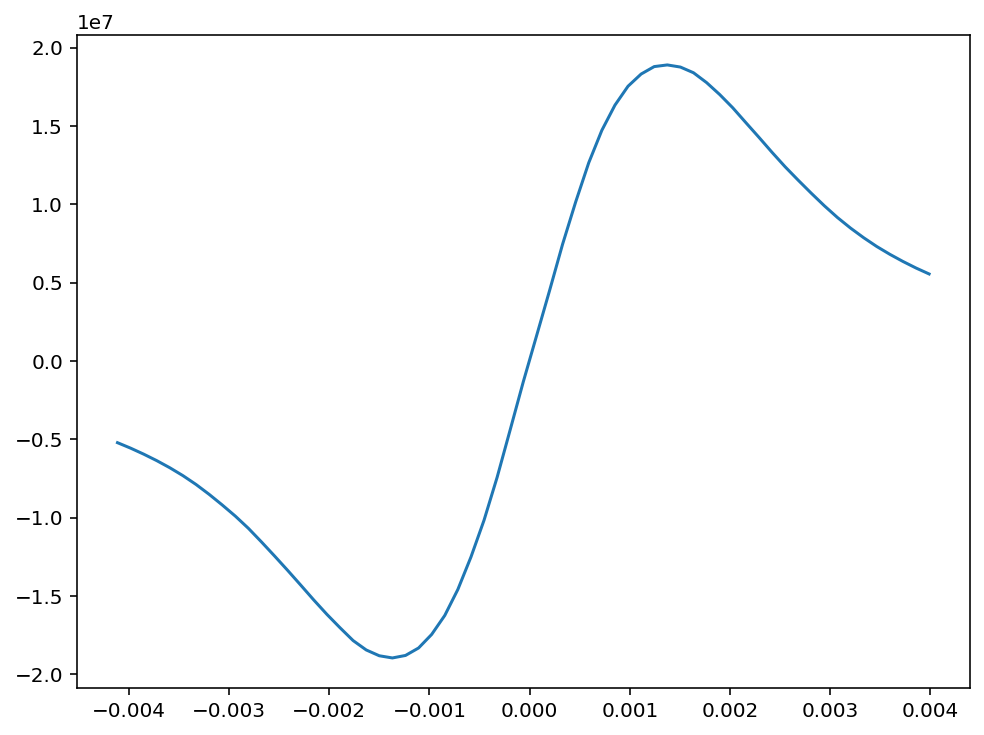

In [5]:
# Simple parser
def parse_lineout(file):
    rdat = np.loadtxt(file)
    columns = ['x', 'y', 'z', 'Ex', 'Ey', 'Ez']
    return {name:rdat[:,i] for i, name in enumerate(columns)}

dat = parse_lineout('x_lineout.dat')
plt.plot(dat['x'], dat['Ex'])

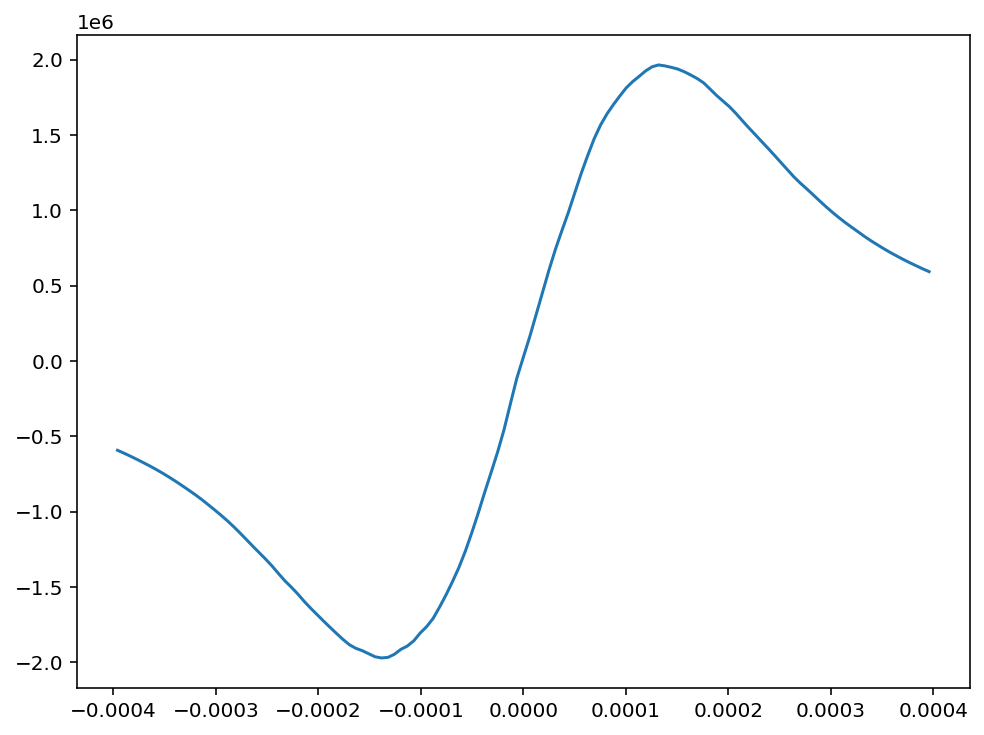

In [6]:
dat = parse_lineout('z_lineout.dat')
plt.plot(dat['z'], dat['Ez'])

In [7]:
# Simple parser
def parse_plane(file):
    """
    
    
    """
    rdat = np.loadtxt(file)
    columns = ['x', 'z', 'Ex', 'Ez', 'By']
    pdat =  {name:rdat[:,i] for i, name in enumerate(columns)}
    
    zvec = sorted(list(set(pdat['z'])))
    xvec = sorted(list(set(pdat['x'])))    
    nx, nz = len(xvec), len(zvec)
    dat = {}
    dat['zvec'] = np.array(zvec)
    dat['xvec'] = np.array(zvec)   
    dat['Ex'] = pdat['Ex'].reshape(nz, nx).T
    dat['Ez'] = pdat['Ez'].reshape(nz, nx).T
    dat['By'] = pdat['By'].reshape(nz, nx).T
    return dat
    

dat = parse_plane('x_z_Ex_Ez_By.dat')

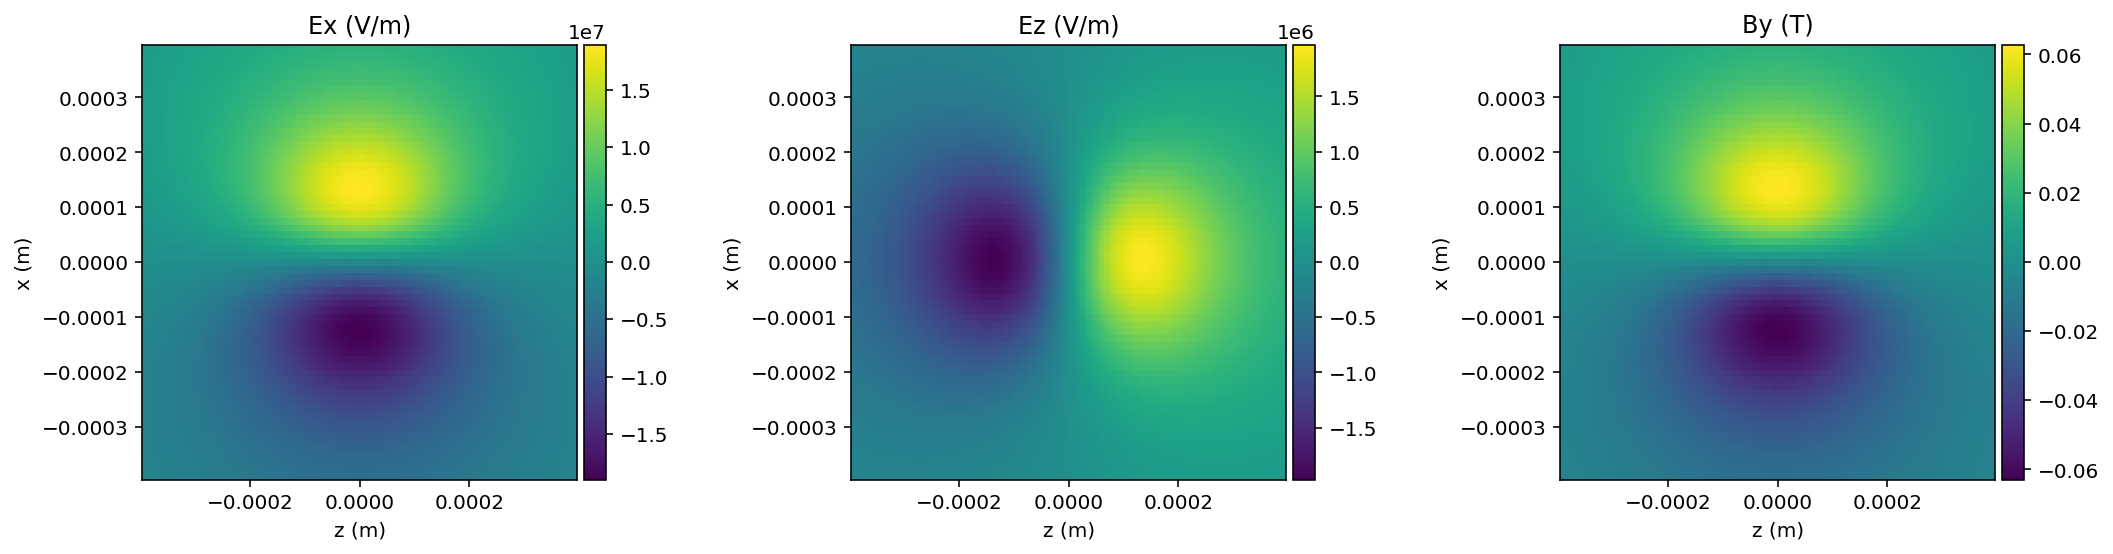

In [8]:
def plot_plane(dat):
    zmin, zmax, xmin, xmax = dat['zvec'].min(), dat['zvec'].max(), dat['xvec'].min(), dat['xvec'].max()
    
    fig, axes = plt.subplots(1,3, figsize=(18,4))
    
    for ax, name, unit in zip(axes, ['Ex', 'Ez', 'By'], ['V/m', 'V/m', 'T']):
        im = ax.imshow(dat[name], origin='lower', extent=[xmin, xmax, zmin, zmax])
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')
        
        ax.set_title(f'{name} ({unit})')
        ax.set_xlabel('z (m)')
        ax.set_ylabel('x (m)')        
plot_plane(dat)

# Paper results

Reproduce plots in:

C. E. Mayes, R. D. Ryne, D. C. Sagan, *3D Space Charge in Bmad*, IPAC2018, Vancouver, BC, Canada
https://accelconf.web.cern.ch/ipac2018/papers/thpak085.pdf

In [9]:
def set_params(filename='params.in', sigma_z=1e-3, sigma_x=1e-3):
    params = f"""
    &OPENSC_TEST_PARAMS
     NXLO=1          ,
     NXHI=128         ,
     NYLO=1          ,
     NYHI=128        ,
     NZLO=1          ,
     NZHI=128       ,
     N_PARTICLE=10000000   ,
     E_TOT=  0.51099891e6     ,
     BUNCH_CHARGE=  1e-9,
     DISTTYPE = 1,
     SIGMA_X=  {sigma_x},
     SIGMA_Y=  1.0000000000000000E-003,
     SIGMA_Z=  {sigma_z},
     GAUSSIANCUTOFF=  6     ,
     DIRECT_FIELD_CALC=T,
     INTEGRATED_GREEN_FUNCTION=T,
     CATHODE_IMAGES=F,
     IMAGE_METHOD=3          ,
     RECTPIPE=F,
     READ_RECTPIPE=F,
     WRITE_RECTPIPE=F,
     APIPE=  1.2000000000000000E-002,
     BPIPE=  1.2000000000000000E-002,
     /
    
    """
    with open(filename, 'w') as f:
        f.write(params)
set_params()        

 ------------------------
&OPENSC_TEST_PARAMS
 NXLO=1          ,
 NXHI=128        ,
 NYLO=1          ,
 NYHI=128        ,
 NZLO=1          ,
 NZHI=128        ,
 N_PARTICLE=10000000   ,
 E_TOT=  510998.90999999997     ,
 BUNCH_CHARGE=  1.0000000000000001E-009,
 SIGMA_X=  1.0000000000000000E-003,
 SIGMA_Y=  1.0000000000000000E-003,
 SIGMA_Z=  1.0000000000000000E-003,
 GAUSSIANCUTOFF=  6.0000000000000000     ,
 DIRECT_FIELD_CALC=T,
 INTEGRATED_GREEN_FUNCTION=T,
 CATHODE_IMAGES=F,
 IMAGE_METHOD=3          ,
 DISTTYPE=1          ,
 RECTPIPE=F,
 READ_RECTPIPE=F,
 WRITE_RECTPIPE=F,
 APIPE=  1.2000000000000000E-002,
 BPIPE=  1.2000000000000000E-002,
 /
 ------------------------
 gamma=   1.0000000000000000     
 beta0=   0.0000000000000000     
 particle xmin,xmax=  -5.1371331804109365E-003   5.2486260066664289E-003
 particle ymin,ymax=  -5.1327292599210534E-003   5.1362984650888356E-003
 particle zmin,zmax=  -5.1727941411408721E-003   5.5060669996351945E-003
 added zcentroid to z particle dat

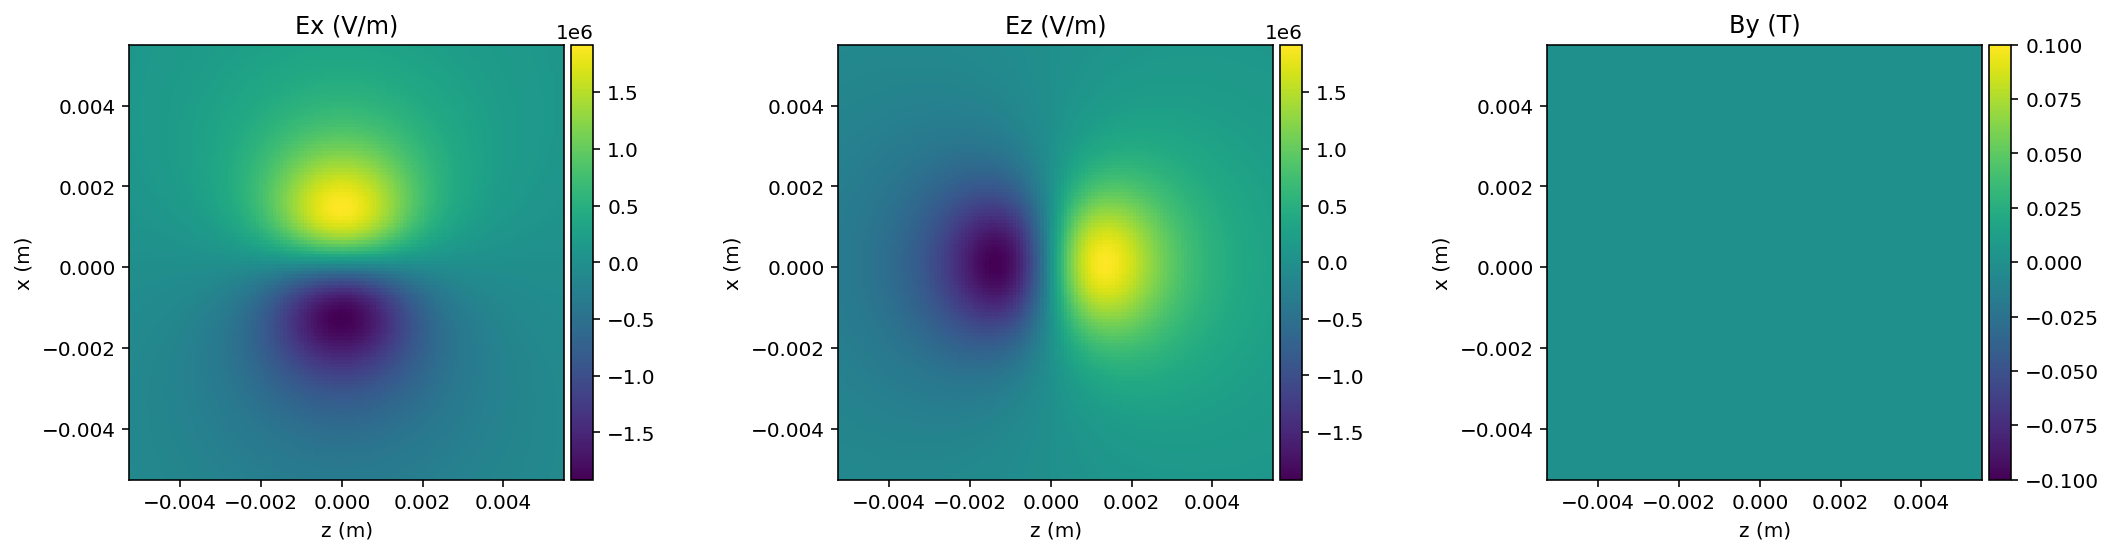

In [10]:
def run_test(verbose=False, **params):
    dat = {}
    tdir = tempfile.TemporaryDirectory()
    fname = os.path.join(tdir.name, 'params.in')
    set_params(filename=fname, **params)
    t0 = time.time()
    res = subprocess.run([TEST_BIN, 'params.in'], cwd=tdir.name, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    dat['run_time'] = time.time() - t0
    if verbose:
        print(res.stdout.decode('utf-8'))

   
    dat['x_line'] = parse_lineout(os.path.join(tdir.name, 'x_lineout.dat'))
    dat['z_line'] = parse_lineout(os.path.join(tdir.name, 'z_lineout.dat'))
    dat['xz_plane'] = parse_plane(os.path.join(tdir.name, 'x_z_Ex_Ez_By.dat'))

    return dat

DAT = run_test(verbose=True)  
plot_plane(DAT['xz_plane'])

In [11]:
%%time
# Run various ratios
ALLDAT = {}
for ratio in [.01, .1, 1, 10]:
    sigma_x = 0.001
    sigma_z = ratio*sigma_x
    ALLDAT[ratio] = run_test(sigma_x=sigma_x, sigma_z=sigma_z)    

CPU times: user 535 ms, sys: 33.4 ms, total: 569 ms
Wall time: 2min 1s


In [12]:
# To plot the charge density. Ignore the normalization.
def gauss(x):
    return np.exp(-x**2/2)

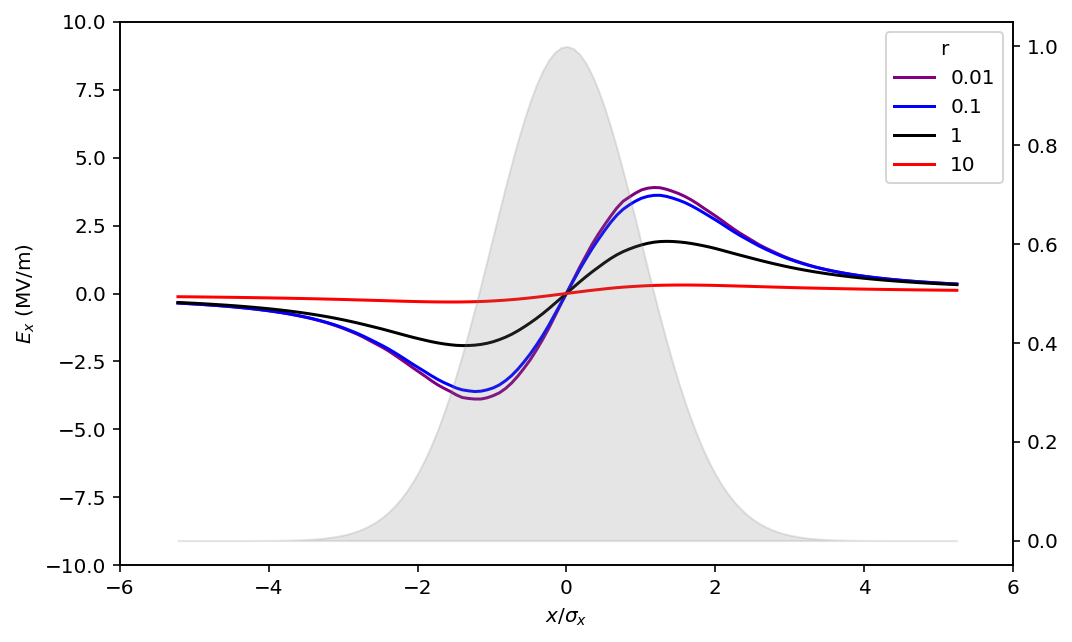

In [13]:
# Ex 

fig, ax = plt.subplots(figsize=(8,5))
COLOR = {1:'black', 0.1:'blue', 0.01: 'purple', 10:'red'}
for ratio in [.01, .1, 1, 10]:    
    dat = ALLDAT[ratio]['x_line']
    x0 = dat['x']
    Ex0 = dat['Ex']
    sigx = .001

    ax.plot(x0/sigx, Ex0/1e6, color=COLOR[ratio], label=f'{ratio}')
    
    
# Charge density    
ax2 = ax.twinx()      
ax2.fill_between(x0/sigx, 0, gauss(x0/sigx), color='gray', alpha=0.2)    

ax.set_xlim(-6, 6)
ax.set_ylim(-10,10)    
ax.set_xlabel(r'$x/\sigma_x$')
ax.set_ylabel(r'$E_x$'+' (MV/m)')    
ax.legend(title='r')

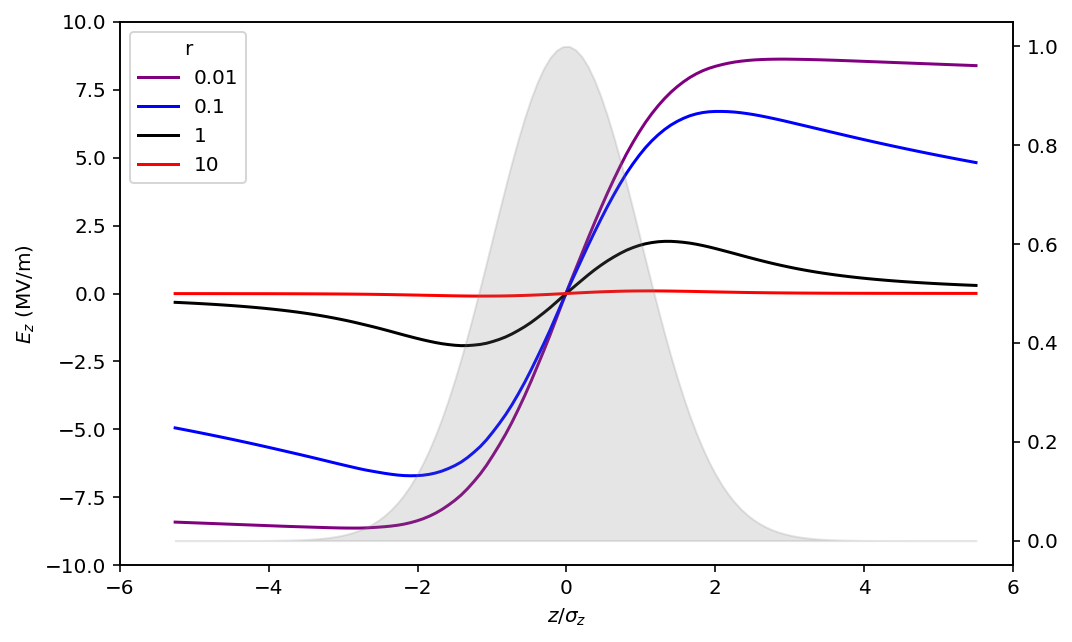

In [14]:
# Ez 

fig, ax = plt.subplots(figsize=(8,5))
COLOR = {1:'black', 0.1:'blue', 0.01: 'purple', 10:'red'}
for ratio in [.01, .1, 1, 10]:    
    sigz = .001*ratio
    dat = ALLDAT[ratio]['z_line']
    z0 = dat['z']
    Ez0 = dat['Ez']
    ax.plot(z0/sigz, Ez0/1e6, color=COLOR[ratio], label=f'{ratio}')
    
    
# Charge density    
ax2 = ax.twinx()      
ax2.fill_between(z0/sigz, 0, gauss(z0/sigz), color='gray', alpha=0.2)    

ax.set_xlim(-6, 6)
ax.set_ylim(-10,10)    
ax.set_xlabel(r'$z/\sigma_z$')
ax.set_ylabel(r'$E_z$'+' (MV/m)')    
ax.legend(title='r')

# Cathode images

Test the three methods

In [15]:
def set_params(filename='params.in', sigma_z=1e-3, sigma_x=1e-3, imethod=3):
    params = f"""
    &OPENSC_TEST_PARAMS
     NXLO=1          ,
     NXHI=64        ,
     NYLO=1          ,
     NYHI=64      ,
     NZLO=1          ,
     NZHI=64      ,
     N_PARTICLE=10000000   ,
     E_TOT=  1e6     ,
     BUNCH_CHARGE=  1e-9,
     DISTTYPE = 0,   
     SIGMA_X=  {sigma_x},
     SIGMA_Y=  1.0000000000000000E-003,
     SIGMA_Z=  {sigma_z},
     GAUSSIANCUTOFF=  6     ,
     DIRECT_FIELD_CALC=T,
     INTEGRATED_GREEN_FUNCTION=T,
     CATHODE_IMAGES=T,
     IMAGE_METHOD={imethod}          ,
     RECTPIPE=F,
     READ_RECTPIPE=F,
     WRITE_RECTPIPE=F,
     APIPE=  1.2000000000000000E-002,
     BPIPE=  1.2000000000000000E-002,
     /
    
    """
    with open(filename, 'w') as f:
        f.write(params)
set_params()        

In [16]:
%%time
IDAT = {}

method = {1:'convolution/correlation', 2:'shifted Green function', 3:"Chris' shifted Green function"}

for imethod in method:
    IDAT[imethod] = run_test(verbose=False, imethod=imethod)

CPU times: user 127 ms, sys: 23.7 ms, total: 150 ms
Wall time: 36.5 s


In [17]:
# Print the times
for i, name in method.items():
    print(f'{IDAT[i]["run_time"]:0.3f} s for {name} ')

13.635 s for convolution/correlation 
13.893 s for shifted Green function 
8.793 s for Chris' shifted Green function 


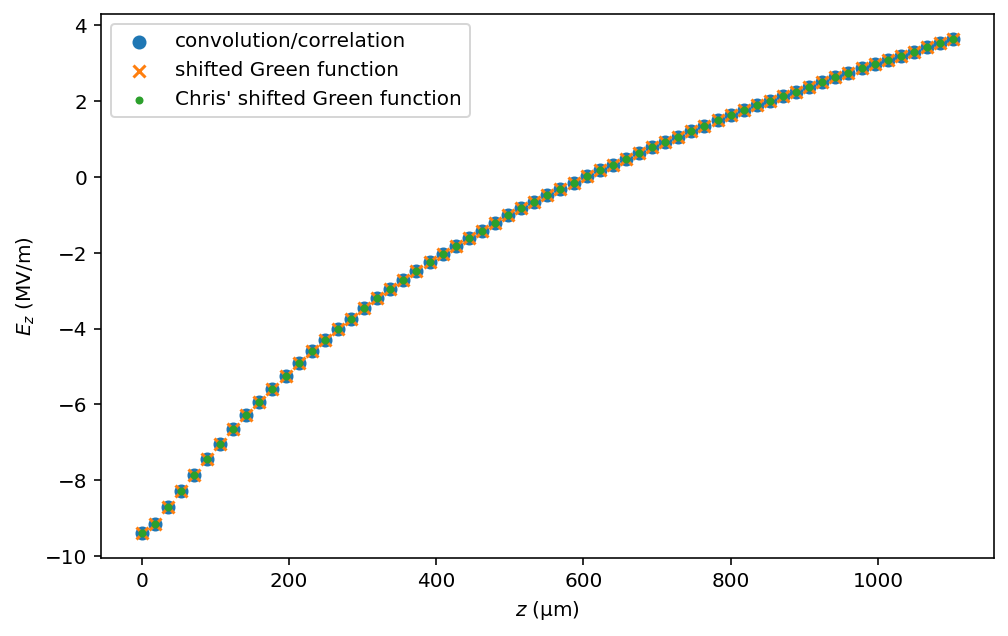

In [18]:
fig, ax = plt.subplots(figsize=(8,5))

isymbol = {1:'o', 2:'x', 3:'.'}

for i, name in method.items():
    zdat = IDAT[i]['z_line']
    z = zdat['z']
    Ez = zdat['Ez']
    
    ax.scatter(z/1e-6, Ez/1e6, label=name, marker=isymbol[i])
    
    ax.set_xlabel(r'$z$'+' (µm)')
    ax.set_ylabel(r'$E_z$'+' (MV/m)')       
plt.legend()

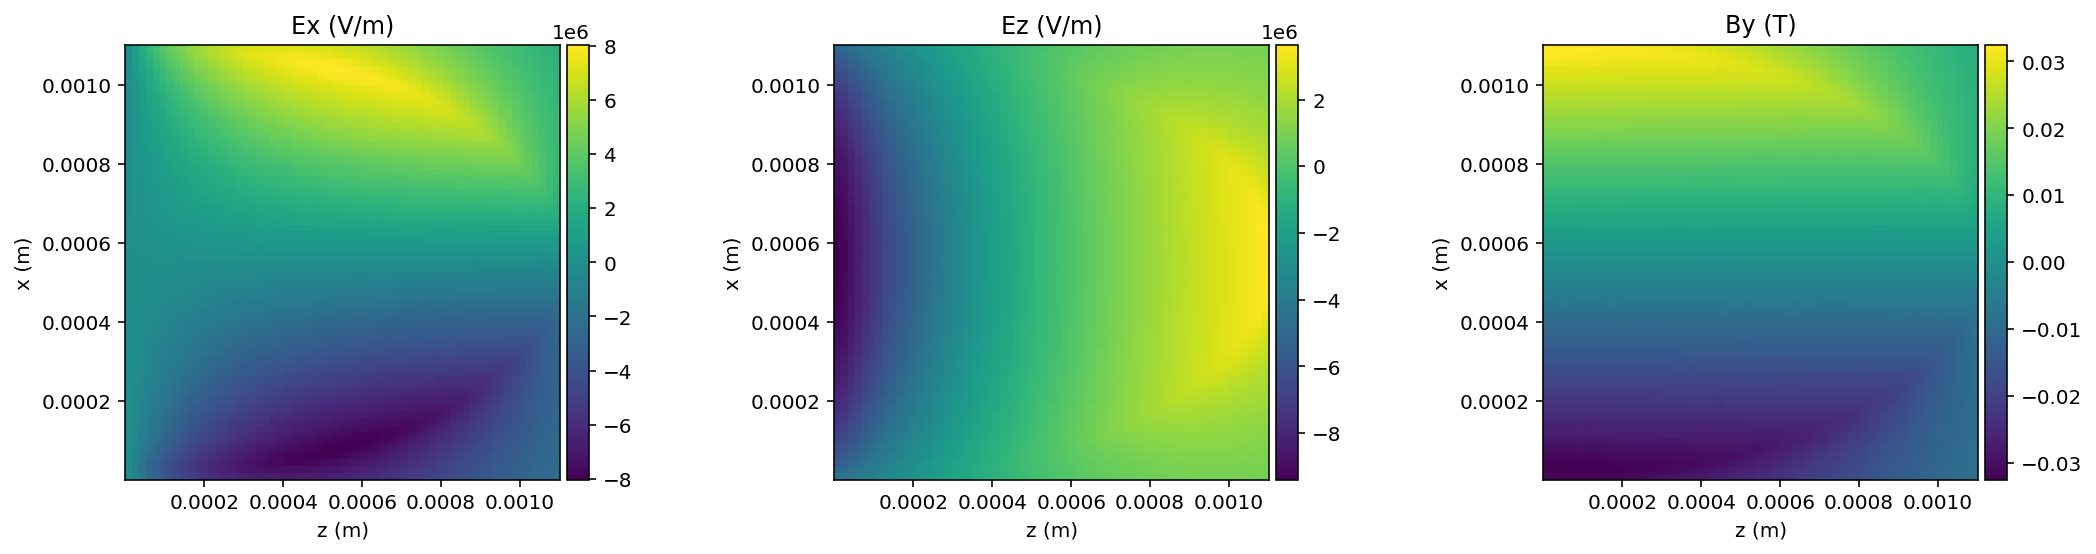

In [19]:
# Method 1
plot_plane(IDAT[1]['xz_plane'])

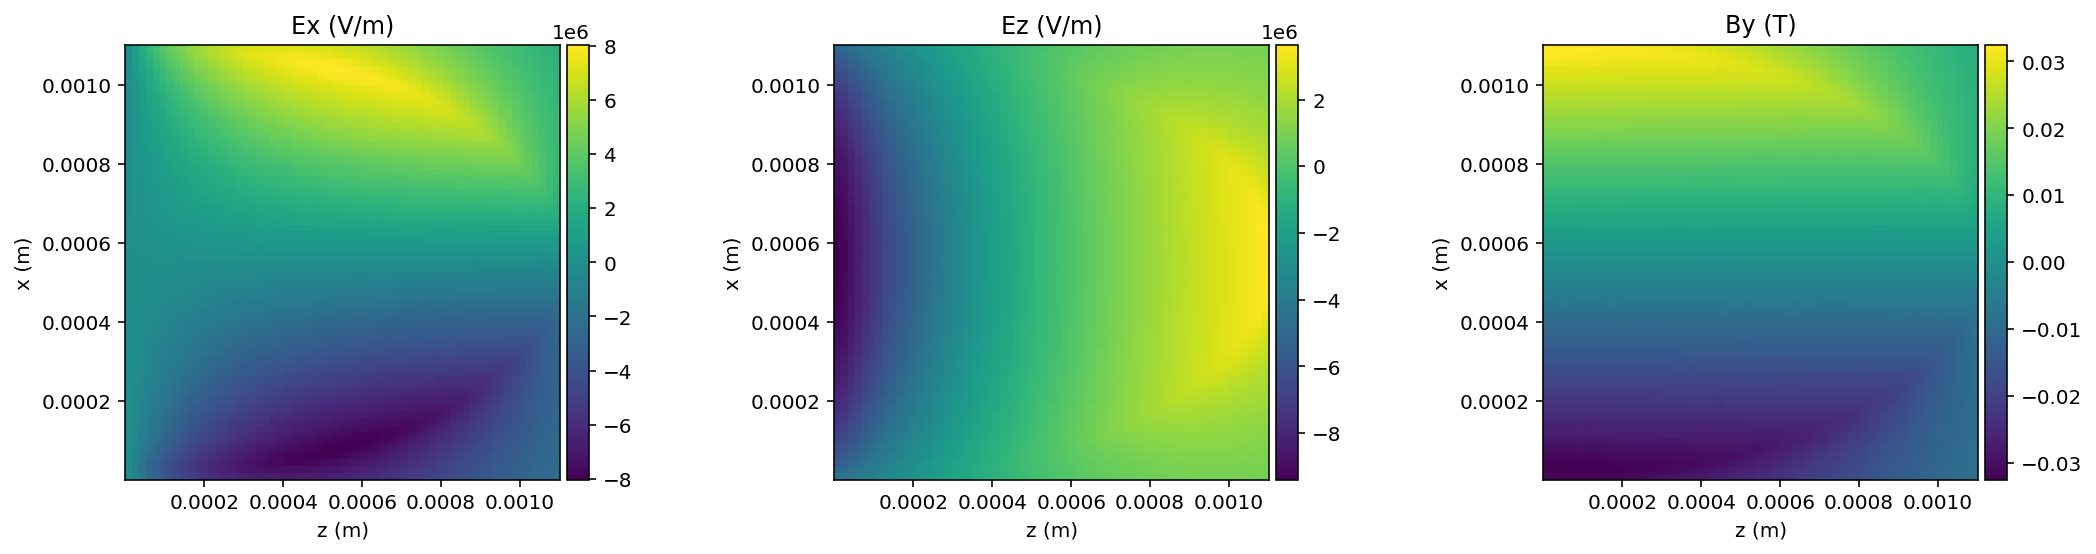

In [20]:
# Method 2
plot_plane(IDAT[2]['xz_plane'])

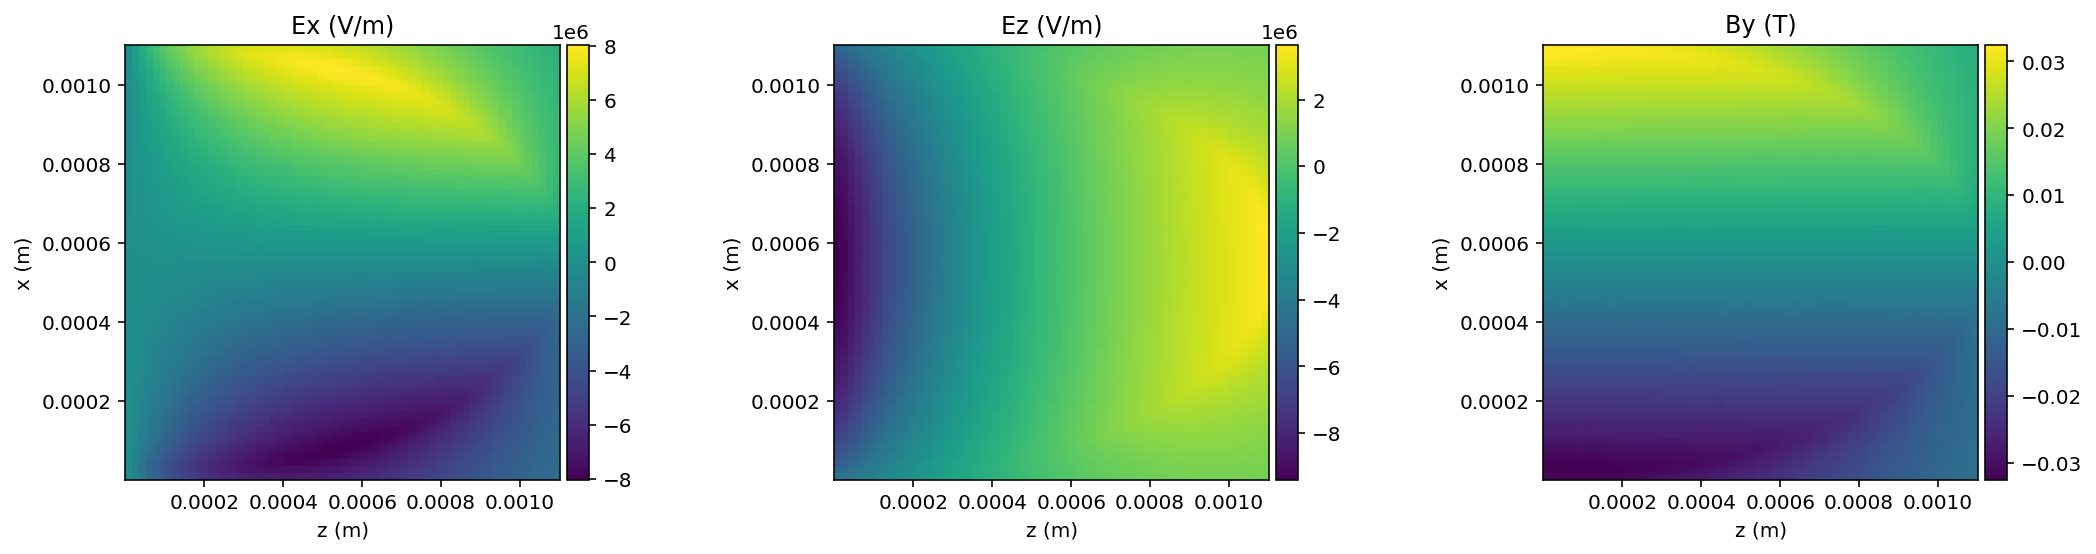

In [21]:
# Method 3
plot_plane(IDAT[3]['xz_plane'])

In [39]:
# Max relative difference 3 vs 1
np.abs(IDAT[3]['xz_plane']['Ez']/IDAT[1]['xz_plane']['Ez']-1).max()

1.4142942337258546e-06

In [40]:
# Max relative difference 2 vs 1
np.abs(IDAT[2]['xz_plane']['Ez']/IDAT[1]['xz_plane']['Ez']-1).max()

1.001019045432372e-09

# Cleanup

In [22]:
# Cleanup
!rm *in
!rm *dat